# <h1><center><span style="color:gray"> REGRESIÓN LOGÍSTICA Y DESCENSO DE GRADIENTE </span></center></h1>
#### <span style="color:gray"> Autor: </span> 
Antonio Romero Martínez-Eiroa

#### <span style="color:gray"> Índice </span>

1. [Carga de librerías](#1)
2. [Carga y análisis de datos](#2)
3. [Clasificación binaria](#3)
4. [Función sigmoide](#4)
4. [Función de coste](#5)
4. [Descenso de gradiente](#6)


#### <a class = "anchor" id ='1' ><span style="color:gray"> 1. Carga de librerías </span></a>

Se cargan las librerías necesarias para realizar el trabajo.

In [6]:
import numpy as np
import pandas as pd
import math

from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#### <a class = "anchor" id ='1' ><span style="color:gray"> 2. Carga y análisis de datos </span></a>

Se carga el dataframe con los datos sobre los que se va a trabajar y se realiza un breve análisis del mismo.

In [7]:
data = pd.read_csv('../data/4_1_data.csv', delimiter = ',')

In [8]:
data.head() 

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
print(data.isna().sum()) 

score-1    0
score-2    0
label      0
dtype: int64


Se comprueba que no hay valores nulos.

#### <a class = "anchor" id ='1' ><span style="color:gray"> 3. Clasificación binaria </span></a>

La clasificación binaria consiste en clasificar los elementos de un conjunto conforme a una regla de clasificación dicotómica. 

In [11]:
scores = data[['score-1', 'score-2']].values
results = data['label'].values

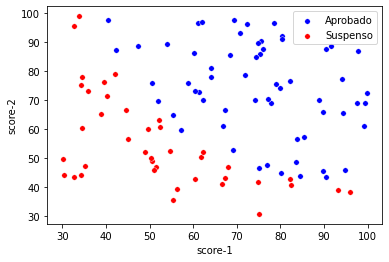

In [14]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "o",
                     color = "blue",
                     s = 30)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "o",
                color = "red",
                s = 30)

ax.set(xlabel="score-1", ylabel="score-2")
ax.legend(["Aprobado", "Suspenso"])
plt.show();

La clasificación estadística es un problema de aprendizaje supervisado dentro de *machine learning*. Las categorías son predefinidad y al introducir nuevos datos (*test*), deberá asignarlos a estás categorías, habiéndose entrenado con los datos de *training*.

En el caso que nos ocupa, se trataría clasificar el resultado de una aginatura entre las categorías de aprobado y suspenso atendiendo a los resultados obtenidos en dos pruebas.

#### <a class = "anchor" id ='1' ><span style="color:gray"> 4. Función sigmoide </span></a>

Se trata de una función logística que representa la progresión temporal de una curva de  curva de aprendizaje, pasando de niveles bajos al principio a alcanza un nivel máximo en el que ya no aumenta de nivel.

In [15]:
def sigmoid_function(x):    
    return 1/ (1 + np.exp(-x))

In [16]:
sigmoid_function(0)

0.5

In [41]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

In [18]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

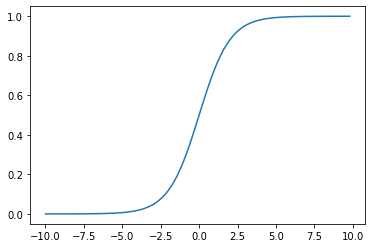

In [19]:
plt.plot(x,sig)
plt.show()

#### <a class = "anchor" id ='1' ><span style="color:gray"> 5. Función de coste </span></a>

La función de coste se utiliza para medir el grado de error del modelo ala hora de predecir, esto se mide como la diferencia entre el valor predicho y el valor real. El objetivo de la predicción es optimizar la función de coste, lo que se traduce en minimizar el error.

In [20]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = sigmoid_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

#### <a class = "anchor" id ='1' ><span style="color:gray"> 6. Descenso de gradiente </span></a>

El descenso de gradiente recorre la función de coste buscando su punto óptimo(mínimo), para ello se calcula la primera derivada de la función de coste y se vectoriza, de manera que indique la pendiente y la direción.

También se tienen en cuenta la ratio de aprendizaje y el número de iteraciones.
La ratio de aprendizaje representa el tamaño del paso en que se mueve por la función.
El número de iteraciones se refiere al número de pasos.

In [42]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores 

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Coste al inicio:", cost)
print("Gradiente al inicio:", gradient)

Coste al inicio: 0.693147180559946
Gradiente al inicio: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


Partiendo de los datos iniciales se trata de optimizar la función de coste mediante el descenso de gradiente.

In [22]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [23]:
theta, costs = gradient_descent(X, y, theta_init, 0.6, 800) 

In [24]:
print("Theta después de aplicar el descenso de gradiente:", theta)
print("Coste resultante:", costs[-1])

Theta después de aplicar el descenso de gradiente: [[1.68170544]
 [3.91439895]
 [3.64928636]]
Coste resultante: 0.20353700601839328


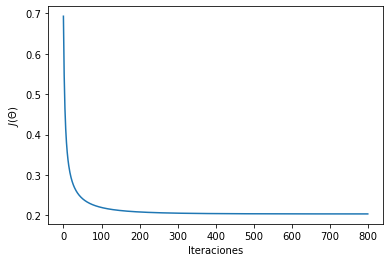

In [25]:
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$"); 

Observando el resultado obtenido se aumenta la ratio de aprendizaje para reducir el número de iteraciones necesarias para alcanzar el mínimo, reduciendo el coste computacioneal.

In [33]:
theta, costs = gradient_descent(X, y, theta_init, 0.8, 600) 

In [34]:
print("Theta después de aplicar el descenso de gradiente:", theta)
print("Coste resultante:", costs[-1])

Theta después de aplicar el descenso de gradiente: [[1.71842827]
 [3.9927423 ]
 [3.72509266]]
Coste resultante: 0.2034977016116665


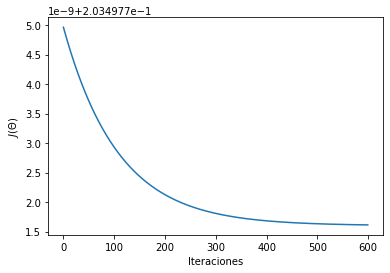

In [35]:
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$"); 

In [36]:
theta, costs = gradient_descent(X, y, theta_init, 1, 400)

In [37]:
print("Theta después de aplicar el descenso de gradiente:", theta)
print("Coste resultante:", costs[-1])

Theta después de aplicar el descenso de gradiente: [[1.7184474 ]
 [3.99278315]
 [3.72513219]]
Coste resultante: 0.20349770159887154


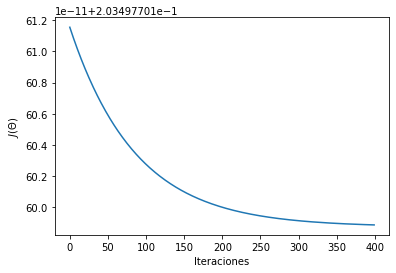

In [38]:
plt.plot(costs)
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$"); 

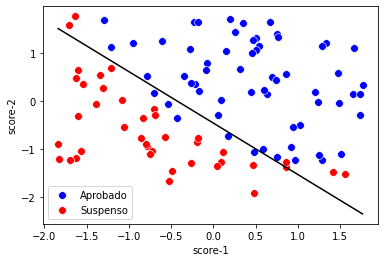

In [40]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "o",
                color = "blue",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "o",
                    color = "red",
                    s = 60)

ax.legend(["Aprobado", "Suspenso"])
ax.set(xlabel="score-1", ylabel="score-2")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="black")
plt.show();


Durente la ejecución del descenso de gradiente se ha tratado de minimizar la cantidad de suspensos que se clasifican como aprobados y viceversa.